## **Notebook 03 — Random Forest**
________
### ***1. Introduction***
### ***In this notebook, we build a Random Forest Classifier to predict users’ purchase intention.***
### ***The model uses the features engineered in previous steps, including the K-Means cluster labels, to improve predictive performance.***
_________
### ***1. Importing Required Libraries***
### ***We import all libraries needed for data handling, model training, evaluation metrics, and visualization.***

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, confusion_matrix)

_______
### ***3. Loading Prepared Datasets***

### ***We load the cleaned and preprocessed datasets generated in earlier notebooks:***
- ***Model_DF.csv → cleaned dataset***

- ***Scaled_DF.csv → scaled dataset used for modeling***
### ***These datasets contain the final features: Recency, Frequency, Monetary, Cluster, and the target variable.***

In [19]:
model_df = pd.read_csv("Model_DF.csv", index_col=0)
model_df.head(10)

,Recency,Frequency,Monetary,Cluster,Target,Cluster_KMeans4
CustomerID,,,,,,
12346.0,326,1,77183.60,1,0,3
12347.0,2,7,4310.00,0,1,0
12348.0,75,4,1797.24,0,1,0
12349.0,19,1,1757.55,0,1,0
12350.0,310,1,334.40,1,0,1
12352.0,36,8,2506.04,0,1,0
12353.0,204,1,89.00,1,0,1
12354.0,232,1,1079.40,1,0,1
12355.0,214,1,459.40,1,0,1


In [20]:
scaled_df = pd.read_csv("Scaled_DF.csv", index_col=0)
scaled_df.head(10)

,Recency,Frequency,Monetary,Cluster,Target
CustomerID,,,,,
12346.0,2.334574,-0.425097,8.358668,1,0
12347.0,-0.905340,0.354417,0.250966,0,1
12348.0,-0.175360,-0.035340,-0.028596,0,1
12349.0,-0.735345,-0.425097,-0.033012,0,1
12350.0,2.174578,-0.425097,-0.191347,1,0
12352.0,-0.565349,0.484336,0.050263,0,1
12353.0,1.114606,-0.425097,-0.218650,1,0
12354.0,1.394599,-0.425097,-0.108461,1,0
12355.0,1.214604,-0.425097,-0.177440,1,0


________
### ***4. Feature Definition and Train-Test Split***

### ***We select our input features:***
- ***Recency***

- ***Frequency***

- ***Monetary***

- ***Cluster (obtained from K-Means)***
### ***The target variable is purchase intention (`Target` column).***
### ***We then split the data into training and test sets using 30% test size and stratification to preserve class balance.***

In [21]:
X = scaled_df[["Recency", "Frequency", "Monetary", "Cluster"]]
y = scaled_df["Target"]

________
### ***5. Model Training: Random Forest***
### ***We initialize a RandomForestClassifier with tuned parameters:***
- ***`n_estimators = 200`***

- ***`min_samples_split = 5`***

- ***`min_samples_leaf = 2`***

- ***`class_weight = "balanced"`***

- ***`n_jobs = -1` (parallel processing)***
### ***The model is trained on the training split.***

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [23]:
X_train.shape, X_test.shape

((3036, 4), (1302, 4))

In [24]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [25]:
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


________
### ***6. Predictions***
### ***The trained Random Forest model is used to generate:***
- ***Class predictions (`y_pred_rf`)***

- ***Probabilities for ROC curve calculation (`y_proba_rf`)***

In [26]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

________
### ***7. Model Evaluation***
### ***We compute the main evaluation metrics:***
- ***Accuracy***

- ***Precision***

- ***Recall***

- ***F1-score***

- ***AUC score***

- ***Confusion Matrix***
### ***We also calculate the ROC curve using predicted probabilities.***

In [27]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

print(acc_rf, prec_rf, rec_rf, f1_rf, auc_rf)
print(cm_rf)

1.0 1.0 1.0 1.0 0.9999999999999999
[[435   0]
 [  0 867]]


________
### ***8. Feature Importance Visualization***
### ***To understand the contribution of each feature, we plot the Random Forest feature importances.***
### ***This helps interpret how much each customer attribute (including clusters) influences the purchase prediction.***

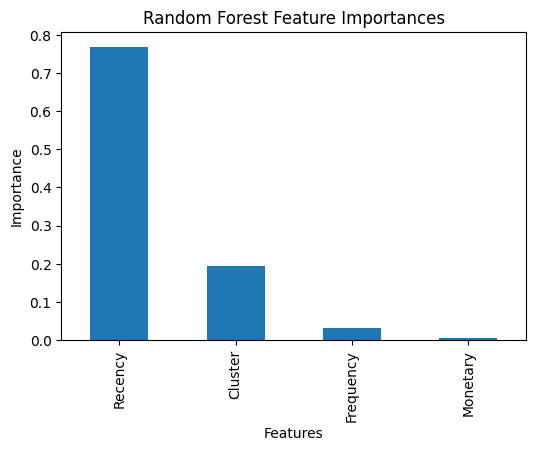

In [28]:
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
fi.plot(kind="bar")
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### ***Confusion Matrix***

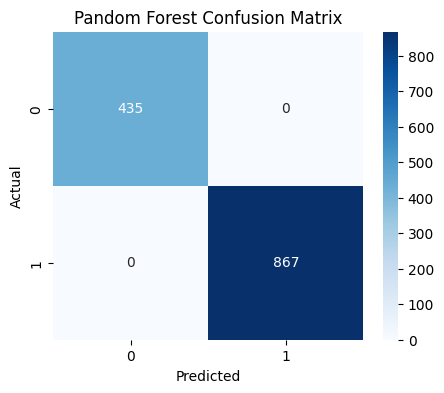

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Pandom Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

________
### ***9. Saving the Model***
### ***The trained model is saved as a `.pkl` file for later use in the comparison notebook and final report.***

In [30]:
with open("rf_model.pkl", "wb") as f: pickle.dump(rf,f)